In [6]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
import numpy as np
from collections import Counter
from matplotlib_venn import venn3, venn2




In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
files_path = '/content/drive/MyDrive/QBC AI/Project_2/'
train_df = pd.read_csv(files_path + "train_data.csv")
test_df = pd.read_csv(files_path + "test_data.csv")
title_brand_df = pd.read_csv(files_path + "title_brand.csv")

<ipython-input-14-643915f0df6e>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(files_path + "train_data.csv")


<div dir="rtl">

### مشخصات داده‌ها:

- **overall**: امتیاز محصول (توسط فرد نظر دهنده) از ۱ تا ۵  
- **vote**: تعداد رای‌های دیدگاه از نظر مفید بودن (helpful)  
- **verified**: آیا تأیید و منتشر شده است یا خیر  
- **reviewTime**: تاریخ ثبت نظر  
- **reviewerID**: شناسه‌ی شخص نظر دهنده  
- **Asin**: شناسه‌ی محصول (برای دسترسی به لینک محصول می‌توانید شناسه را بعد از `https://www.amazon.com/dp/` قرار دهید)  
- **style**: دیکشنری شامل برخی توضیحات محصول مثل رنگ، سایز و غیره  
- **reviewerName**: نام شخص نظر دهنده  
- **reviewText**: متن نظر  
- **summary**: خلاصه‌ی نظر  
- **unixReviewTime**: زمان ثبت نظر با فرمت Unix Time  

</div>


# 1. توزیع ستون overall

Overall Score Distribution
overall
5    0.550078
4    0.186561
1    0.098874
3    0.096835
2    0.067652
Name: proportion, dtype: float64


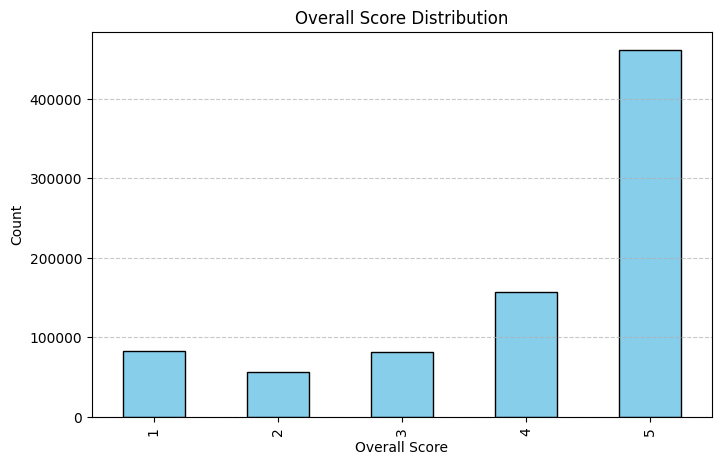

In [15]:
# بررسی توازن داده‌ها
distribution = train_df['overall'].value_counts(normalize=True)
print("Overall Score Distribution")
print(distribution)

plt.figure(figsize=(8,5))
train_df['overall'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Overall Score")
plt.ylabel("Count")
plt.title("Overall Score Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<div style="direction: rtl; text-align: right; font-family: Arial, sans-serif; font-size: 14px;">
    <b>Undersampling (کاهش نمونه‌های پرتکرار)</b>
    <br>
    کاهش تعداد نمونه‌های کلاس‌های پرتکرار (مثلاً کاهش امتیازات ۵) به سطح کلاس‌های کمتر تکرار شده.
    <br><br>
    <b>Oversampling (افزایش نمونه‌های نادر)</b>
    <br>
    افزایش داده‌های کلاس‌های دارای نمونه کم با تکرار داده‌ها یا تولید داده‌های جدید.
    <br><br>
    می‌توان مدل را طوری تنظیم کرد که هنگام آموزش، به کلاس‌های کمتر تکرار شده وزن بیشتری بدهد تا تأثیر آن‌ها بیشتر شود.
</div>

#2. ابر کلمات (Word Cloud)

In [16]:
# تعریف دسته‌های احساسات
def categorize_sentiment(score):
    if score >= 4:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

# پیش‌پردازش متن
def preprocess_text(text):
    text = str(text).lower()  # تبدیل به حروف کوچک
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # حذف اعداد و نشانه‌گذاری‌ها
    words = text.split()
    words = [word for word in words if word not in stop_words]  # حذف stopwords
    return ' '.join(words)

# رسم ابر کلمات
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

In [18]:
# stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # لیست کلمات زائد


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


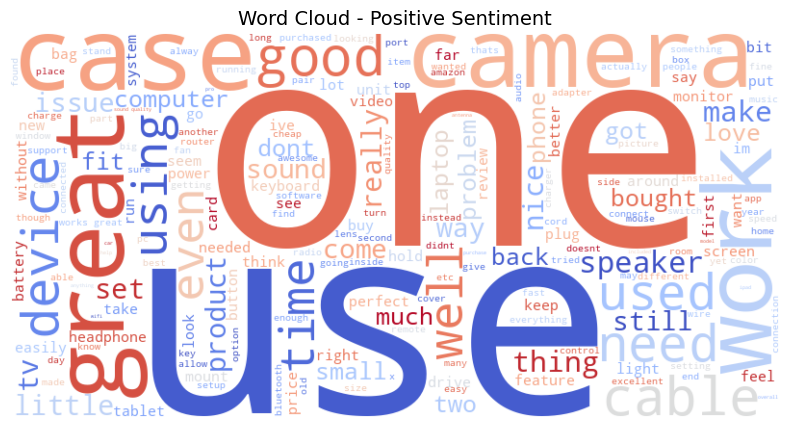

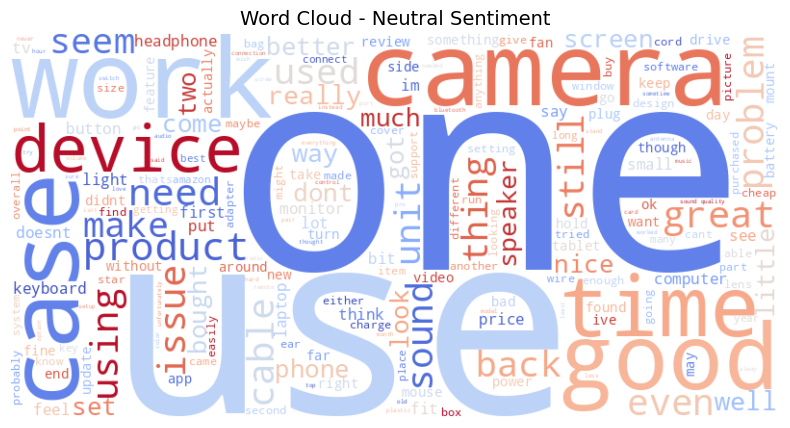

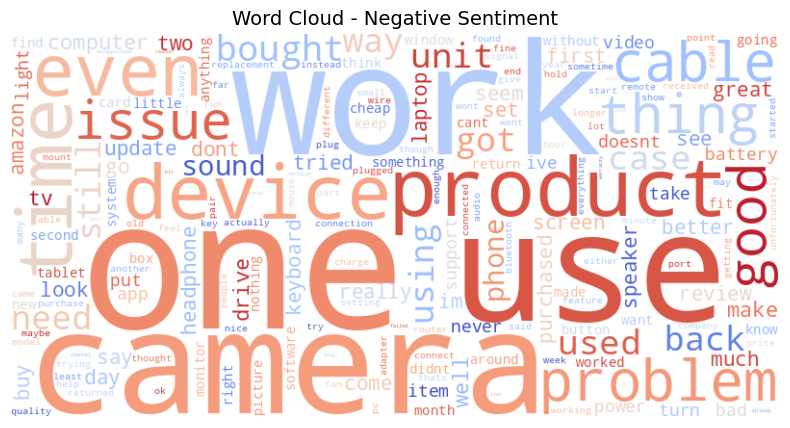

In [19]:

train_df["sentiment"] = train_df["overall"].apply(categorize_sentiment)
train_df["cleaned_review"] = train_df["reviewText"].apply(preprocess_text)

# تولید و نمایش ابر کلمات برای هر دسته
for sentiment in ["positive", "neutral", "negative"]:
    sample_texts = train_df[train_df["sentiment"] == sentiment]["cleaned_review"].sample(n=min(10000, len(train_df[train_df["sentiment"] == sentiment])), random_state=42)  # انتخاب 10,000 نظر تصادفی
    text_data = ' '.join(sample_texts)
    plot_wordcloud(text_data, f"Word Cloud - {sentiment.capitalize()} Sentiment")


### کلمات مشترک بین همه‌ی دسته‌ها

#### **"use" (استفاده)**
✅ **در مثبت:** `"easy to use", "great to use"`  
❌ **در منفی:** `"hard to use", "doesn’t work", "problem using"`  
⚖ **در خنثی:** *توصیفی بی‌طرفانه مانند* `"can use", "using it for work"`  
📝 **تفسیر:** این نشان می‌دهد که کاربران در هر سه دسته درباره‌ی استفاده از محصول نظر می‌دهند، اما **لحن جمله** تعیین‌کننده‌ی احساسات آن است.

---

#### **"one" (یکی، یک مورد)**
✅ **در مثبت:** `"one of the best", "love this one"`  
❌ **در منفی:** `"one problem I faced", "only one worked"`  
⚖ **در خنثی:** `"one more feature", "one option available"`  
📝 **تفسیر:** این کلمه به طور کلی در مورد **اشاره به تعداد یا تجربه یک نمونه از محصول** استفاده می‌شود، اما **همراهی آن با کلمات دیگر** حس جمله را مشخص می‌کند.

---

#### **"device" (دستگاه)**
✅ **در مثبت:** `"this device works great", "perfect device"`  
❌ **در منفی:** `"device stopped working", "bad device"`  
⚖ **در خنثی:** `"this device is useful for work"`  
📝 **تفسیر:** در نظرات مثبت، این کلمه با **عبارات تحسین‌آمیز** همراه است، اما در نظرات منفی با **مشکلات عملکردی** همراه می‌شود.

---

## ** تفاوت‌های کلیدی در دسته‌های مثبت و منفی**

### **✅ کلمات مثبت منحصر‌به‌فرد**
`"great", "love", "nice", "perfect", "excellent", "amazing"`
📝 **تفسیر:** کاربران هنگام **رضایت، از صفات قوی و تأکیدی** استفاده می‌کنند.

### **❌ کلمات منفی منحصر‌به‌فرد**
`"problem", "issue", "bad", "poor", "return", "broken", "doesn’t work"`
📝 **تفسیر:** نظرات منفی معمولاً شامل کلماتی **مرتبط با مشکلات فنی، خرابی، کیفیت پایین و تجربه‌ی بد خرید** هستند.


In [23]:
def get_top_words(texts, n=100):
    all_words = ' '.join(texts).lower().split()
    filtered_words = [word for word in all_words if word not in stop_words]
    word_counts = Counter(filtered_words)
    return set([word for word, _ in word_counts.most_common(n)])


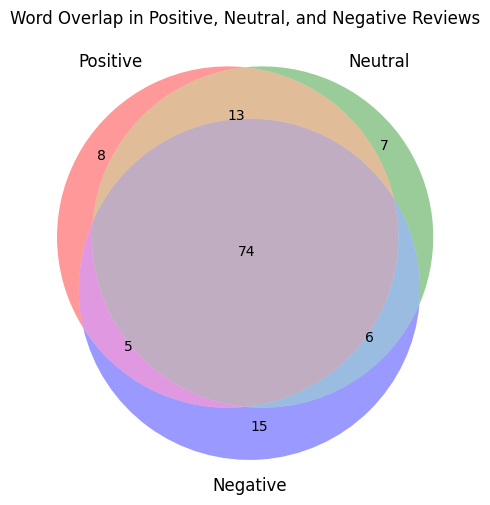

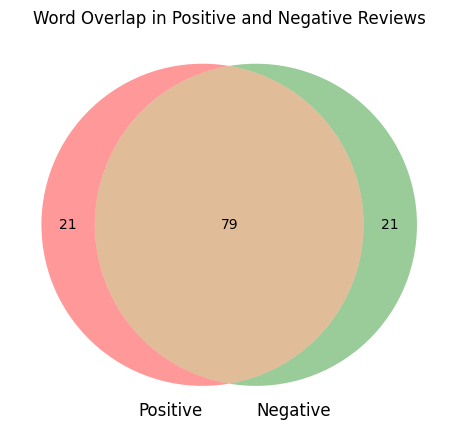

In [24]:
# استخراج 100 کلمه پرتکرار برای هر دسته
positive_words = get_top_words(train_df[train_df["sentiment"] == "positive"]["reviewText"], 100)
neutral_words = get_top_words(train_df[train_df["sentiment"] == "neutral"]["reviewText"], 100)
negative_words = get_top_words(train_df[train_df["sentiment"] == "negative"]["reviewText"], 100)

#  نمودار ون برای سه گروه (مثبت، خنثی، منفی)
plt.figure(figsize=(8,6))
venn3([positive_words, neutral_words, negative_words],
      set_labels=('Positive', 'Neutral', 'Negative'))
plt.title("Word Overlap in Positive, Neutral, and Negative Reviews")
plt.show()

#  نمودار ون برای دو گروه (مثبت و منفی)
plt.figure(figsize=(6,5))
venn2([positive_words, negative_words],
      set_labels=('Positive', 'Negative'))
plt.title("Word Overlap in Positive and Negative Reviews")
plt.show()

In [29]:
common_words_all = positive_words & neutral_words & negative_words

# اشتراک بین گروه‌های مثبت و منفی
common_words_pos_neg = positive_words & negative_words

# اختصاصی هر گروه
unique_positive = positive_words - (neutral_words | negative_words)
unique_neutral = neutral_words - (positive_words | negative_words)
unique_negative = negative_words - (positive_words | neutral_words)

# نمایش نتایج
print("🔹 10 مشترک بین سه دسته:", list(common_words_all)[:10])
print("🔹 10 مشترک بین مثبت و منفی:", list(common_words_pos_neg)[:10])
print("\n 10 کلمه اختصاصی نظرات مثبت:", list(unique_positive)[:10])
print(" 10 کلمه اختصاصی نظرات خنثی:", list(unique_neutral)[:10])
print(" 10 کلمه اختصاصی نظرات منفی:", list(unique_negative)[:10])

🔹 10 مشترک بین سه دسته: ['cable', 'phone', 'product', 'get', 'set', '3', 'first', 'worked', 'tv', 'could']
🔹 10 مشترک بین مثبت و منفی: ['get', 'set', 'seems', 'good', 'got', 'computer', 'using', 'want', 'even', 'device']

 10 کلمه اختصاصی نظرات مثبت: ['love', 'laptop', 'far', 'best', 'great.', 'take', 'looking', 'well.']
 10 کلمه اختصاصی نظرات خنثی: ['issue', 'may', 'give', 'however,', 'probably', 'stars', 'look']
 10 کلمه اختصاصی نظرات منفی: ['work.', 'every', '5', 'support', 'card', 'amazon', 'return', 'turn', 'working', 'last']


# 3. ده نفری که در مجموع نظرات‌شان بیشتر مفید واقع شده

In [28]:
# تبدیل مقادیر ستون vote به عددی (در صورتی که مقدار نامعتبر باشد آن را صفر در نظر می‌گیریم)
train_df["vote"] = pd.to_numeric(train_df["vote"], errors="coerce").fillna(0)

# محاسبه مجموع vote برای هر کاربر
top_reviewers = train_df.groupby("reviewerName")["vote"].sum().reset_index()

# مرتب‌سازی بر اساس مجموع vote به ترتیب نزولی و انتخاب 10 نفر برتر
top_reviewers = top_reviewers.sort_values(by="vote", ascending=False).head(10)

In [ ]:
top_reviewers

,reviewerName,vote
8814,Amazon Customer,28871.0
18911,Benson Leung,4572.0
125747,Michael,3710.0
128120,Mike,3000.0
106007,Kindle Customer,2927.0
93478,John,2730.0
46080,Dave,2230.0
46527,David,2194.0
33876,Chris,2060.0
174700,Steve,2046.0


# ۴. هیستوگرام طول متن

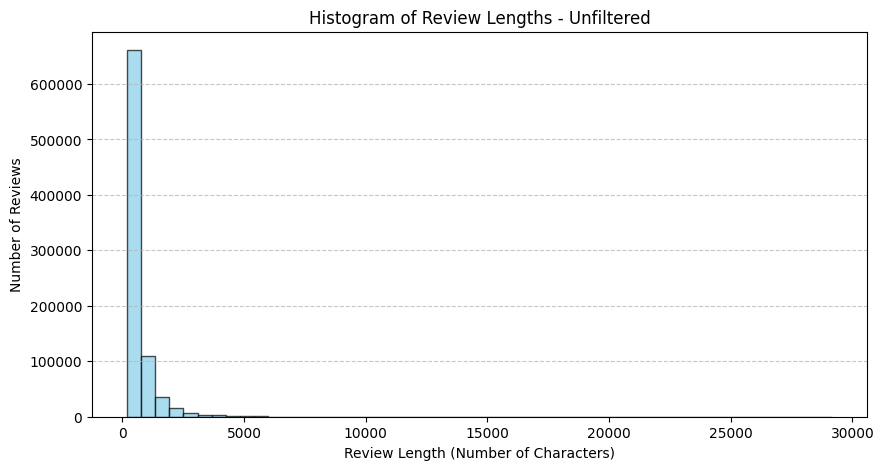

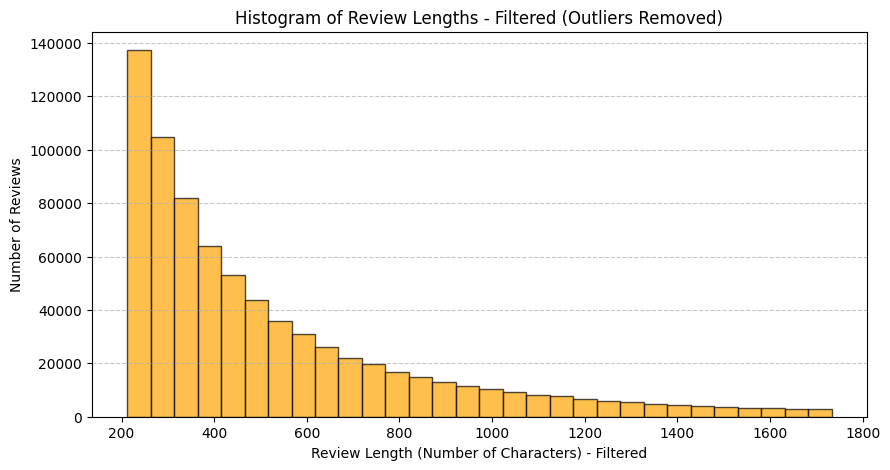

In [ ]:
# حذف مقادیر NaN در ستون reviewText
reviewText_df = train_df.dropna(subset=["reviewText"])

# محاسبه طول هر نظر (تعداد کاراکترها)
reviewText_df["review_length"] = reviewText_df["reviewText"].apply(len)

# رسم هیستوگرام اصلی
plt.figure(figsize=(10, 5))
plt.hist(reviewText_df["review_length"], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Review Length (Number of Characters)")
plt.ylabel("Number of Reviews")
plt.title("Histogram of Review Lengths - Unfiltered")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# فیلتر کردن داده‌ها (حذف مقادیر پرت)
lower_bound, upper_bound = np.percentile(reviewText_df["review_length"], [5, 95])  # حذف 5% کوچکترین و بزرگترین نظرات
filtered_df = reviewText_df[(reviewText_df["review_length"] >= lower_bound) & (reviewText_df["review_length"] <= upper_bound)]

# رسم هیستوگرام فیلترشده
plt.figure(figsize=(10, 5))
plt.hist(filtered_df["review_length"], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Review Length (Number of Characters) - Filtered")
plt.ylabel("Number of Reviews")
plt.title("Histogram of Review Lengths - Filtered (Outliers Removed)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# آیا نیاز به محدودیت در تعداد کاراکترها داریم؟
بله، اعمال محدودیت روی تعداد کاراکترها می‌تواند به بهبود مدل‌سازی کمک کند، زیرا:

- **نظرات بسیار کوتاه** (مثلاً کمتر از **50 کاراکتر**) معمولاً اطلاعات کافی برای تحلیل احساسات ندارند.
- **نظرات بسیار بلند** (مثلاً بیشتر از **2000 کاراکتر**) ممکن است **نویز داشته باشند**، باعث افزایش پیچیدگی مدل شوند و به حافظه و زمان پردازش بیشتری نیاز داشته باشند.
- **توزیع داده‌ها در نمودار فیلتر شده نشان می‌دهد که اکثریت نظرات در محدوده 200 تا 1000 کاراکتر قرار دارند،** بنابراین حذف موارد پرت منطقی به نظر می‌رسد.

---

## پیشنهاد محدوده‌ی مناسب برای تعداد کاراکترها
### ✅ حداقل طول پیشنهاد شده: **50 یا 100 کاراکتر**
🔹 زیرا نظرات بسیار کوتاه ممکن است اطلاعات مفیدی برای تحلیل احساسات نداشته باشند.

### ✅ حداکثر طول پیشنهاد شده: **1000 تا 1500 کاراکتر**
🔹 بر اساس **هیستوگرام فیلترشده**، بیشتر نظرات در این بازه قرار دارند.  
🔹 طول‌های بالاتر معمولاً تعداد نمونه‌های کمی دارند و ممکن است نویز باشند.


#5. محصولات بیشترین امتیاز پنج

In [ ]:
train_df = train_df.dropna(subset=["overall", "asin"])

# فیلتر کردن نظرات با امتیاز 5
df_5star = train_df[train_df["overall"] == 5]

# شمارش تعداد نظرات 5 ستاره برای هر محصول
top_products = df_5star.groupby("asin").size().reset_index(name="5_star_count")

# مرتب‌سازی بر اساس بیشترین نظرات 5 ستاره و انتخاب 10 مورد برتر
top_products = top_products.sort_values(by="5_star_count", ascending=False).head(10)

# ترکیب داده‌ها با اطلاعات محصول برای نمایش نام برند و عنوان محصول
top_products = top_products.merge(title_brand_df, on="asin", how="left")

# انتخاب و نمایش ستون‌های مورد نیاز
top_products = top_products[["brand", "title", "5_star_count"]]

In [ ]:
top_products

,brand,title,5_star_count
0,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,1163
1,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700),659
2,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...,600
3,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,598
4,Logitech,Logitech M570 Wireless Trackball Mouse &ndash;...,552
5,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,529
6,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,471
7,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,448
8,"Arlo Technologies, Inc",Arlo - Wireless Home Security Camera System | ...,433
9,Samsung,Samsung 850 EVO 250GB 2.5-Inch SATA III Intern...,431


# 6.  برندی که بیشترین تعداد نظر

In [ ]:

# حذف مقادیر NaN از ستون‌های مورد نیاز
train_df = train_df.dropna(subset=["overall", "asin"])
title_brand_df = title_brand_df.dropna(subset=["brand"])

# شمارش تعداد نظرات برای هر برند
brand_reviews = train_df.merge(title_brand_df, on="asin", how="left")
top_brands = brand_reviews["brand"].value_counts().head(10).index

# فیلتر کردن داده‌ها برای 10 برند برتر
filtered_brands = brand_reviews[brand_reviews["brand"].isin(top_brands)]

# محاسبه میانگین امتیاز برای هر برند
brand_avg_rating = filtered_brands.groupby("brand")["overall"].mean().reset_index()

# مرتب‌سازی بر اساس میانگین امتیاز به ترتیب نزولی
brand_avg_rating = brand_avg_rating.sort_values(by="overall", ascending=False)


In [ ]:
brand_avg_rating

,brand,overall
1,Anker,4.244320
0,AmazonBasics,4.201468
5,Sabrent,4.028005
7,SanDisk,3.958810
3,Logitech,3.954061
6,Samsung,3.941268
8,Sony,3.938726
9,TP-LINK,3.928681
2,Asus,3.855550
4,NETGEAR,3.836274
